<img src="./img/HWNI_logo.svg"/>

# Tutorial A - Sampling and Bootstrapping

In [4]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import util.utils as utils
import util.shared as shared

shared.format_plots()
shared.format_dataframes()

## Introduction

Traditionally, the correlation is represented by the letter $r$.

Why $r$? The $r$ stands for *regression*, and we learned in class that there's a close connection between regression and correlation.

But why *regression*? Doesn't that usually mean moving backwards? 

If you're curious, check out the material below for a bit of history, otherwise you can move on to the next section.

In fact, it does mean moving backwards in statistics as well. The term goes back to the late 19th century, when statistics was being developed, primarily for the purpose of measuring human populations. Of particular interest to statisticians at this time was the science of heredity (biological evolution being one of the first non-deterministic scientific theories). 

Note also that at this time, most scientists and mathematicians were aristocratic or independently wealthy males, as only a person with a steady income from other sources could afford the luxury of experimental apparatus and uninterrupted study, and women were largely barred. The Western European upper classes of this time were enamored with the theories of scientific racism and sexism, which helped to assuage the cognitive dissonance caused by combining their liberal sentiments about all persons being created equal with the material fact that equal opportunity was denied to almost all persons in their society, and they kind of liked it that way.

Enter [Sir Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton), the half-cousin of Charles Darwin and the scion of a Quaker family who made their fortune dealing arms [(I am not making this up)](https://theironroom.wordpress.com/2015/03/23/faith-and-disunity-samuel-galton-and-the-quakers/). He was concerned to know whether the male children of tall fathers were themselves taller than average -- prejudices regarding height being then more explicit then than [they are now](http://gladwell.com/blink/why-do-we-love-tall-men/). He collected the relevant data and then invented linear modeling to summarize it. 

Sir Francis was delighted to discover that the average height of the son was correlated with the average height of the father, but horrified to see that the slope of this line was less than 1! This meant that, on average, sons would be shorter than their fathers, and their sons shorter than them, and so on. He termed this phenomenon [*regression to mediocrity*](https://books.google.com/books?id=JPcRAAAAYAAJ&pg=PA246#v=onepage&q&f=false), and the term stuck.

## Cautionary Tales

In addition to not implying causation, correlation is also frequently misinterpreted in the following way: uncorrelated variables have no dependence on each other. This is untrue.

Below, let's play with some data that is poorly described by its correlation.

The easiest way to generate this data is to generate random values for $x$ and then generate each $y$ by applying some function to each $x$ and adding some scaled normal noise to the output (here, using the variable `noise_level`).

Here are some ideas for functions to try:

- `np.power`
- `np.sin`, `.cos`, `.tan`, or other trigonometric functions
- `min`, `max`
- a function that draws a random number, like `np.random.choice` or `np.random.randint`

In [39]:
num_points = 500
noise_level = 1
x_spread = 3

f = lambda x: np.power(x,2)

#f = lambda x: np.arctan(x)

#f = lambda x: max(x,0)

## neural firing as a function of overlap w receptive field?
f = lambda x: max(x,0)+max(np.random.standard_normal()*0.5+1,0)

## h/t to Bruno Olshausen
f = lambda x: np.random.choice([-1,1])*x

## mixture-of-gaussians
#f = lambda x: np.random.randint(-1,4)*x

## product-of-gaussians
#f = lambda x: np.random.standard_normal()*x

xs = np.random.standard_normal(num_points)*x_spread
ys = np.asarray([f(x)+np.random.standard_normal()*noise_level for x in xs])

df = pd.DataFrame.from_dict({'x':xs,'y':ys})

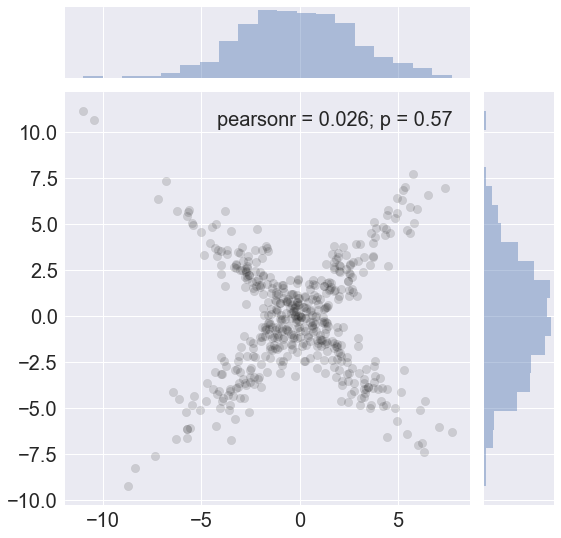

In [40]:
scatter_kws = {'alpha':0.15,
                'color':'k',
                 's':72}

sns.jointplot(xs,ys,
              joint_kws = scatter_kws,
              size = 8);